In [1]:
import torch
import numpy as np
import plotly.graph_objects as go

from torch_utils import *
from normals import compute_normals
from bunny import get_bunny
from sirens import Siren, gradient
from sphere_trace import render

In [2]:
def sample_on_rays(pc, ego, num_samples=10):
    sample_pts = torch.clamp(trand(num_samples).expand(3, pc.shape[0], num_samples).transpose(0, 2), max=0.8)
    sample_space = (pc - ego).expand(num_samples, pc.shape[0], 3)

    return sample_pts * sample_space

<ipython-input-3-af9c91fef292>:32: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  aligned = (aligned > 0).nonzero()


/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



reconstruction loss tensor(34.5874, device='cuda:0', grad_fn=<MulBackward0>) eikonal loss tensor(37.7309, device='cuda:0', grad_fn=<MulBackward0>) exterior loss tensor(0., device='cuda:0', grad_fn=<MulBackward0>) inter loss tensor(0.8248, device='cuda:0', grad_fn=<MulBackward0>) normal_loss tensor(100.7719, device='cuda:0', grad_fn=<MulBackward0>)
worst of last batch tensor(0.1245, device='cuda:0', grad_fn=<MaxBackward1>)


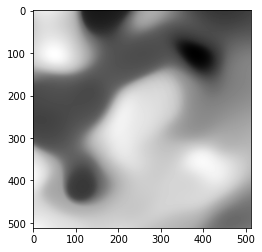

epoch 1: 149.05429077148438
epoch 2: 141.16322326660156
epoch 3: 142.97503662109375
epoch 4: 148.52206420898438
epoch 5: 145.78652954101562
epoch 6: 144.17591857910156
epoch 7: 139.44680786132812
epoch 8: 139.2736053466797
epoch 9: 137.945068359375
epoch 11: 139.79830932617188
epoch 12: 138.18829345703125
epoch 13: 136.0436248779297
epoch 14: 137.43011474609375
epoch 15: 134.26779174804688
epoch 16: 134.0388946533203
epoch 17: 129.6666259765625
epoch 18: 131.47938537597656
epoch 19: 129.7794189453125
epoch 21: 129.9384307861328
epoch 22: 125.42443084716797
epoch 23: 124.67853546142578
epoch 24: 127.37142181396484
epoch 25: 125.67867279052734
epoch 26: 121.60154724121094
epoch 27: 123.84239196777344
epoch 28: 124.88489532470703
epoch 29: 126.55697631835938
epoch 31: 120.9327621459961
epoch 32: 124.8018798828125
epoch 33: 124.2908706665039
epoch 34: 126.38077545166016
epoch 35: 119.885009765625
epoch 36: 123.77049255371094
epoch 37: 124.86581420898438
epoch 38: 124.8592758178711
epoch 39

/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



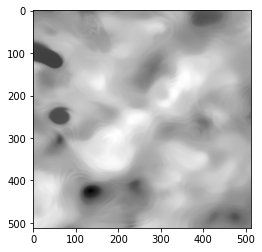

epoch 101: 119.01714324951172
epoch 102: 122.20801544189453
epoch 103: 118.30742645263672
epoch 104: 114.87933349609375
epoch 105: 119.3706283569336
epoch 106: 120.44656372070312
epoch 107: 113.52079772949219
epoch 108: 121.75141906738281
epoch 109: 120.44245910644531
epoch 111: 118.11463165283203
epoch 112: 118.11375427246094
epoch 113: 121.18290710449219
epoch 114: 121.1832046508789
epoch 115: 121.32917785644531
epoch 116: 120.19274139404297
epoch 117: 115.99759674072266
epoch 118: 123.93402099609375
epoch 119: 120.6002197265625
epoch 121: 118.02085876464844
epoch 122: 117.85812377929688
epoch 123: 119.987060546875
epoch 124: 118.09537506103516
epoch 125: 119.89839935302734
epoch 126: 118.00912475585938
epoch 127: 117.5314712524414
epoch 128: 119.00244140625
epoch 129: 116.50732421875
epoch 131: 118.59190368652344
epoch 132: 120.14094543457031
epoch 133: 116.06936645507812
epoch 134: 121.0059585571289
epoch 135: 118.23387145996094
epoch 136: 118.13461303710938
epoch 137: 119.90455627

/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



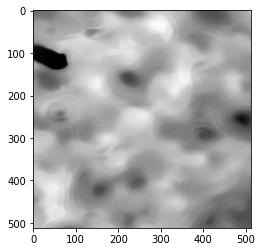

epoch 201: 115.9107894897461
epoch 202: 117.6606216430664
epoch 203: 117.37391662597656
epoch 204: 116.82278442382812
epoch 205: 117.86396789550781
epoch 206: 116.63423156738281
epoch 207: 117.92927551269531
epoch 208: 114.86822509765625
epoch 209: 120.78640747070312
epoch 211: 117.99359130859375
epoch 212: 115.63190460205078
epoch 213: 117.78876495361328
epoch 214: 116.57118225097656
epoch 215: 117.58137512207031
epoch 216: 115.27922821044922
epoch 217: 117.59739685058594
epoch 218: 115.17112731933594
epoch 219: 117.02392578125
epoch 221: 116.68351745605469
epoch 222: 116.9375
epoch 223: 117.87998962402344
epoch 224: 116.63154602050781
epoch 225: 115.10152435302734
epoch 226: 119.57234954833984
epoch 227: 117.35568237304688
epoch 228: 116.05162048339844
epoch 229: 114.324951171875
epoch 231: 114.76303100585938
epoch 232: 116.49560546875
epoch 233: 113.85899353027344
epoch 234: 116.44901275634766
epoch 235: 115.9313735961914
epoch 236: 118.0398178100586
epoch 237: 117.20670318603516
ep

/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



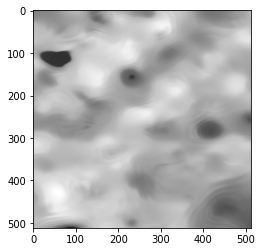

epoch 301: 112.0380859375
epoch 302: 115.5501937866211
epoch 303: 115.08645629882812
epoch 304: 115.41792297363281
epoch 305: 115.64797973632812
epoch 306: 116.21377563476562
epoch 307: 112.71044158935547
epoch 308: 114.26590728759766
epoch 309: 117.32752990722656
epoch 311: 117.05669403076172
epoch 312: 113.43758392333984
epoch 313: 114.01180267333984
epoch 314: 113.40777587890625
epoch 315: 115.39025115966797
epoch 316: 113.32484436035156
epoch 317: 116.24916076660156
epoch 318: 116.4715576171875
epoch 319: 116.19979858398438
epoch 321: 114.19551849365234
epoch 322: 115.19717407226562
epoch 323: 116.90985870361328
epoch 324: 112.2462158203125
epoch 325: 111.37555694580078
epoch 326: 114.53800201416016
epoch 327: 115.2320556640625
epoch 328: 114.622314453125
epoch 329: 115.32484436035156
epoch 331: 114.6099853515625
epoch 332: 111.40653991699219
epoch 333: 117.39338684082031
epoch 334: 115.45426940917969
epoch 335: 114.143310546875
epoch 336: 115.04415130615234
epoch 337: 114.70044708

/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



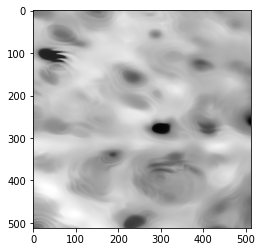

epoch 401: 113.18390655517578
epoch 402: 115.03651428222656
epoch 403: 111.49600219726562
epoch 404: 113.90946197509766
epoch 405: 113.51803588867188
epoch 406: 114.25801086425781
epoch 407: 112.46661376953125
epoch 408: 112.3839111328125
epoch 409: 114.05939483642578
epoch 411: 115.82783508300781
epoch 412: 110.17381286621094
epoch 413: 115.89794158935547
epoch 414: 113.59097290039062
epoch 415: 111.46443939208984
epoch 416: 114.8843765258789
epoch 417: 109.85801696777344
epoch 418: 115.13331604003906
epoch 419: 114.35369110107422
epoch 421: 112.8442153930664
epoch 422: 113.86576080322266
epoch 423: 111.90867614746094
epoch 424: 113.3485336303711
epoch 425: 113.97164916992188
epoch 426: 114.84004211425781
epoch 427: 110.53395080566406
epoch 428: 111.2584228515625
epoch 429: 114.91382598876953
epoch 431: 113.68355560302734
epoch 432: 114.66468811035156
epoch 433: 114.1405029296875
epoch 434: 113.79796600341797
epoch 435: 113.36962890625
epoch 436: 114.71834564208984
epoch 437: 112.0007

/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



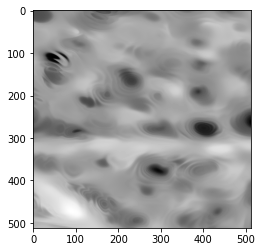

epoch 501: 113.37686157226562
epoch 502: 112.96345520019531
epoch 503: 111.73014068603516
epoch 504: 109.35791778564453
epoch 505: 113.08084106445312
epoch 506: 107.81635284423828
epoch 507: 112.03946685791016
epoch 508: 112.41587829589844
epoch 509: 113.53079223632812
epoch 511: 111.5564193725586
epoch 512: 111.5216064453125
epoch 513: 112.93936920166016
epoch 514: 109.76518249511719
epoch 515: 113.10025024414062
epoch 516: 111.07914733886719
epoch 517: 112.1655502319336
epoch 518: 112.7282485961914
epoch 519: 109.50833892822266
epoch 521: 111.94169616699219
epoch 522: 110.03165435791016
epoch 523: 112.98235321044922
epoch 524: 112.75712585449219
epoch 525: 114.5636978149414
epoch 526: 112.48997497558594
epoch 527: 111.23641204833984
epoch 528: 111.5733413696289
epoch 529: 112.5936050415039
epoch 531: 112.25430297851562
epoch 532: 114.08133697509766
epoch 533: 111.1229248046875
epoch 534: 111.45291900634766
epoch 535: 109.67050170898438
epoch 536: 108.53141021728516
epoch 537: 111.142

/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



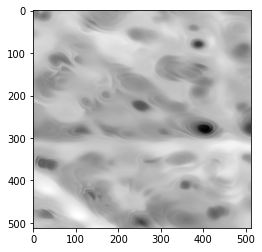

epoch 601: 111.08733367919922
epoch 602: 114.00714111328125
epoch 603: 110.40849304199219
epoch 604: 111.02267456054688
epoch 605: 109.22048950195312
epoch 606: 109.93403625488281
epoch 607: 108.77951049804688
epoch 608: 110.54163360595703
epoch 609: 108.0516586303711
epoch 611: 110.49627685546875
epoch 612: 109.7574462890625
epoch 613: 112.27223205566406
epoch 614: 110.29134368896484
epoch 615: 111.691650390625
epoch 616: 110.51663208007812
epoch 617: 107.86834716796875
epoch 618: 110.22999572753906
epoch 619: 108.30036163330078
epoch 621: 107.58480072021484
epoch 622: 110.77647399902344
epoch 623: 109.48780822753906
epoch 624: 106.88167572021484
epoch 625: 108.55235290527344
epoch 626: 113.54426574707031
epoch 627: 110.63358306884766
epoch 628: 108.92973327636719
epoch 629: 108.90656280517578
epoch 631: 109.62740325927734
epoch 632: 108.04934692382812
epoch 633: 109.42191314697266
epoch 634: 107.82969665527344
epoch 635: 109.40021514892578
epoch 636: 110.01091003417969
epoch 637: 109

/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



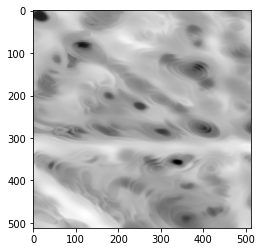

epoch 701: 108.48729705810547
epoch 702: 107.83824920654297
epoch 703: 109.82217407226562
epoch 704: 110.4417495727539
epoch 705: 109.692626953125
epoch 706: 108.51714324951172
epoch 707: 107.86846160888672
epoch 708: 109.5675277709961
epoch 709: 110.3328857421875
epoch 711: 108.60304260253906
epoch 712: 108.36270141601562
epoch 713: 113.32540130615234
epoch 714: 109.00145721435547
epoch 715: 111.3698501586914
epoch 716: 111.48272705078125
epoch 717: 108.172607421875
epoch 718: 108.99050903320312
epoch 719: 108.62660217285156
epoch 721: 107.56961059570312
epoch 722: 111.30352020263672
epoch 723: 109.39584350585938
epoch 724: 109.1484603881836
epoch 725: 109.70255279541016
epoch 726: 106.10354614257812
epoch 727: 106.25494384765625
epoch 728: 111.29080963134766
epoch 729: 108.07569885253906
epoch 731: 108.57227325439453
epoch 732: 110.1397705078125
epoch 733: 111.13383483886719
epoch 734: 110.47663879394531
epoch 735: 110.57696533203125
epoch 736: 107.50511169433594
epoch 737: 110.37982

/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



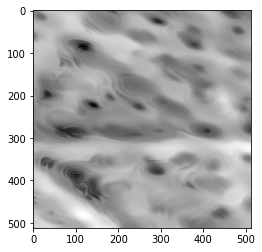

epoch 801: 106.02288818359375
epoch 802: 108.3985824584961
epoch 803: 104.8243408203125
epoch 804: 105.5896224975586
epoch 805: 106.88079833984375
epoch 806: 107.73261260986328
epoch 807: 107.173095703125
epoch 808: 107.52085876464844
epoch 809: 107.11497497558594
epoch 811: 108.27047729492188
epoch 812: 106.30213165283203
epoch 813: 107.4852066040039
epoch 814: 107.21416473388672
epoch 815: 110.46034240722656
epoch 816: 110.92188262939453
epoch 817: 106.7901840209961
epoch 818: 111.41234588623047
epoch 819: 106.55059051513672
epoch 821: 106.35234069824219
epoch 822: 108.31005859375
epoch 823: 108.12879180908203
epoch 824: 107.41494750976562
epoch 825: 105.71231842041016
epoch 826: 107.94709014892578
epoch 827: 105.59906005859375
epoch 828: 106.5588607788086
epoch 829: 106.43034362792969
epoch 831: 106.4284896850586
epoch 832: 106.37444305419922
epoch 833: 107.1222152709961
epoch 834: 109.6400146484375
epoch 835: 107.78733825683594
epoch 836: 106.48892211914062
epoch 837: 105.871322631

/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



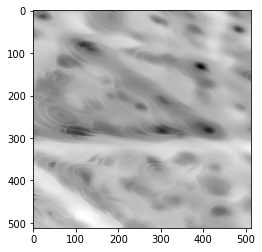

epoch 901: 106.3799819946289
epoch 902: 106.06690216064453
epoch 903: 108.6361312866211
epoch 904: 104.627685546875
epoch 905: 106.23556518554688
epoch 906: 106.8976821899414
epoch 907: 109.81295776367188
epoch 908: 106.78260040283203
epoch 909: 105.58370971679688
epoch 911: 105.83979797363281
epoch 912: 107.06645965576172
epoch 913: 109.34982299804688
epoch 914: 106.40733337402344
epoch 915: 106.05277252197266
epoch 916: 106.32131958007812
epoch 917: 109.57763671875
epoch 918: 105.38778686523438
epoch 919: 105.96232604980469
epoch 921: 108.60840606689453
epoch 922: 104.92008209228516
epoch 923: 106.95111846923828
epoch 924: 107.1090087890625
epoch 925: 106.80592346191406
epoch 926: 109.4931640625
epoch 927: 108.0309829711914
epoch 928: 109.38375854492188
epoch 929: 105.7869644165039
epoch 931: 107.22853088378906
epoch 932: 107.69133758544922
epoch 933: 108.17391204833984
epoch 934: 107.97994232177734
epoch 935: 106.99153137207031
epoch 936: 109.2215576171875
epoch 937: 109.92753601074

/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



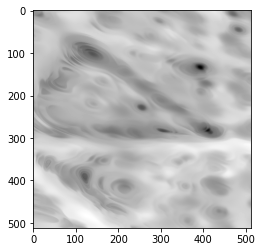

epoch 1001: 106.76396179199219
epoch 1002: 106.16926574707031
epoch 1003: 105.13212585449219
epoch 1004: 103.9077377319336
epoch 1005: 107.24890899658203
epoch 1006: 103.20602416992188
epoch 1007: 107.68753814697266
epoch 1008: 105.1434326171875
epoch 1009: 105.99214172363281
epoch 1011: 106.82872772216797
epoch 1012: 107.8140869140625
epoch 1013: 105.50514221191406
epoch 1014: 107.99961853027344
epoch 1015: 105.60922241210938
epoch 1016: 104.91728210449219
epoch 1017: 104.94761657714844
epoch 1018: 104.55121612548828
epoch 1019: 104.89967346191406
epoch 1021: 104.33242797851562
epoch 1022: 106.52781677246094
epoch 1023: 108.16902160644531
epoch 1024: 106.58283996582031
epoch 1025: 106.70469665527344
epoch 1026: 106.76913452148438
epoch 1027: 104.74507904052734
epoch 1028: 107.69010925292969
epoch 1029: 109.21240234375
epoch 1031: 108.36659240722656
epoch 1032: 106.88135528564453
epoch 1033: 107.41021728515625
epoch 1034: 108.25910186767578
epoch 1035: 106.23847961425781
epoch 1036: 10

/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



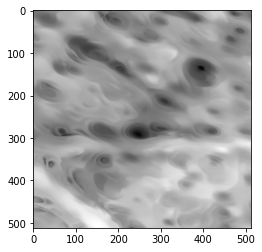

epoch 1101: 108.50989532470703
epoch 1102: 105.79597473144531
epoch 1103: 104.54084777832031
epoch 1104: 107.16249084472656
epoch 1105: 108.5411376953125
epoch 1106: 107.14230346679688
epoch 1107: 107.78581237792969
epoch 1108: 106.94459533691406
epoch 1109: 104.2766342163086
epoch 1111: 103.28714752197266
epoch 1112: 106.04804992675781
epoch 1113: 108.06752014160156
epoch 1114: 107.96593475341797
epoch 1115: 106.24173736572266
epoch 1116: 106.72293853759766
epoch 1117: 105.76622772216797
epoch 1118: 110.84346008300781
epoch 1119: 104.94705963134766
epoch 1121: 105.81346893310547
epoch 1122: 104.44430541992188
epoch 1123: 108.74649047851562
epoch 1124: 102.36492156982422
epoch 1125: 106.71829223632812
epoch 1126: 106.26439666748047
epoch 1127: 103.32659149169922
epoch 1128: 105.55371856689453
epoch 1129: 106.41664123535156
epoch 1131: 105.75152587890625
epoch 1132: 108.2238998413086
epoch 1133: 106.46142578125
epoch 1134: 106.719970703125
epoch 1135: 105.11820983886719
epoch 1136: 107.

/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



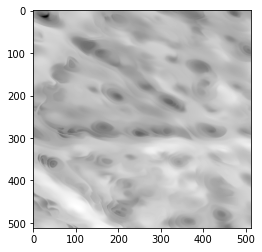

epoch 1201: 106.18022155761719
epoch 1202: 104.8062973022461
epoch 1203: 103.81133270263672
epoch 1204: 104.37613677978516
epoch 1205: 104.86031341552734
epoch 1206: 107.7195053100586
epoch 1207: 107.30209350585938
epoch 1208: 103.76803588867188
epoch 1209: 105.61531829833984
epoch 1211: 104.80577850341797
epoch 1212: 107.66963195800781
epoch 1213: 107.93766021728516
epoch 1214: 105.30451965332031
epoch 1215: 106.05926513671875
epoch 1216: 106.53507995605469
epoch 1217: 103.82728576660156
epoch 1218: 105.85794067382812
epoch 1219: 106.05493927001953
epoch 1221: 104.59723663330078
epoch 1222: 104.84757995605469
epoch 1223: 108.15189361572266
epoch 1224: 104.28634643554688
epoch 1225: 101.59605407714844
epoch 1226: 105.19157409667969
epoch 1227: 103.20219421386719
epoch 1228: 106.37731170654297
epoch 1229: 107.47057342529297
epoch 1231: 108.81067657470703
epoch 1232: 104.40303039550781
epoch 1233: 104.30108642578125
epoch 1234: 107.90157318115234
epoch 1235: 102.1558837890625
epoch 1236:

/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



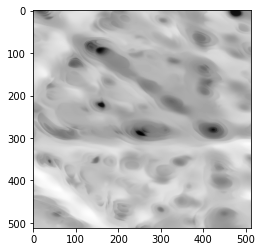

epoch 1301: 106.82040405273438
epoch 1302: 103.44855499267578
epoch 1303: 104.5338134765625
epoch 1304: 103.67952728271484
epoch 1305: 105.00151824951172
epoch 1306: 104.52058410644531
epoch 1307: 104.29688262939453
epoch 1308: 103.2818832397461
epoch 1309: 106.0605239868164
epoch 1311: 105.07978820800781
epoch 1312: 103.71385955810547
epoch 1313: 102.68618774414062
epoch 1314: 105.68292236328125
epoch 1315: 105.86398315429688
epoch 1316: 104.22815704345703
epoch 1317: 105.33902740478516
epoch 1318: 107.11847686767578
epoch 1319: 104.25515747070312
epoch 1321: 103.79048919677734
epoch 1322: 103.85688781738281
epoch 1323: 105.80062103271484
epoch 1324: 105.25070190429688
epoch 1325: 105.68350982666016
epoch 1326: 105.28199005126953
epoch 1327: 102.87110137939453
epoch 1328: 102.58834838867188
epoch 1329: 103.38056945800781
epoch 1331: 104.57524108886719
epoch 1332: 105.42890167236328
epoch 1333: 104.62348937988281
epoch 1334: 104.83218383789062
epoch 1335: 104.23651123046875
epoch 1336:

/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



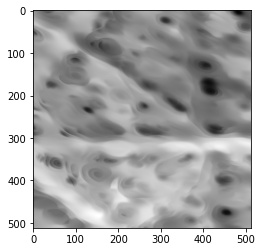

epoch 1401: 104.74028015136719
epoch 1402: 103.44181823730469
epoch 1403: 102.38404083251953
epoch 1404: 104.10667419433594
epoch 1405: 106.13396453857422
epoch 1406: 105.90792846679688
epoch 1407: 103.47569274902344
epoch 1408: 108.17935180664062
epoch 1409: 105.06119537353516
epoch 1411: 105.18541717529297
epoch 1412: 105.17509460449219
epoch 1413: 102.56073760986328
epoch 1414: 103.91446685791016
epoch 1415: 105.86251068115234
epoch 1416: 102.0147705078125
epoch 1417: 107.48387145996094
epoch 1418: 103.89410400390625
epoch 1419: 105.64422607421875
epoch 1421: 105.21329498291016
epoch 1422: 105.92044830322266
epoch 1423: 104.46383666992188
epoch 1424: 104.88868713378906
epoch 1425: 105.16508483886719
epoch 1426: 104.85171508789062
epoch 1427: 102.50263214111328
epoch 1428: 101.67977905273438
epoch 1429: 106.43303680419922
epoch 1431: 102.68120574951172
epoch 1432: 103.65011596679688
epoch 1433: 105.33619689941406
epoch 1434: 103.78562927246094
epoch 1435: 103.69657135009766
epoch 143

/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



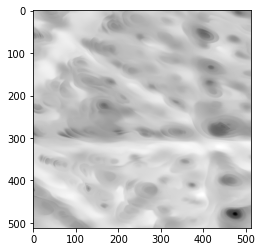

epoch 1501: 101.75566864013672
epoch 1502: 101.37239074707031
epoch 1503: 104.00556945800781
epoch 1504: 103.40628051757812
epoch 1505: 104.75232696533203
epoch 1506: 104.05328369140625
epoch 1507: 105.58944702148438
epoch 1508: 104.86357116699219
epoch 1509: 105.77749633789062
epoch 1511: 104.09234619140625
epoch 1512: 103.87572479248047
epoch 1513: 104.81694030761719
epoch 1514: 102.15772247314453
epoch 1515: 103.68065643310547
epoch 1516: 102.55792999267578
epoch 1517: 103.19868469238281
epoch 1518: 104.32418060302734
epoch 1519: 103.00347137451172
epoch 1521: 106.21980285644531
epoch 1522: 104.4604721069336
epoch 1523: 102.71137237548828
epoch 1524: 101.8297348022461
epoch 1525: 104.36962890625
epoch 1526: 102.2811508178711
epoch 1527: 104.65607452392578
epoch 1528: 105.72891998291016
epoch 1529: 104.00398254394531
epoch 1531: 104.55595397949219
epoch 1532: 102.33460998535156
epoch 1533: 103.07332611083984
epoch 1534: 103.6716537475586
epoch 1535: 106.6482162475586
epoch 1536: 104.

/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



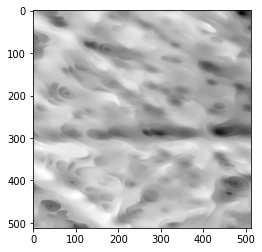

epoch 1601: 105.43953704833984
epoch 1602: 105.27584075927734
epoch 1603: 103.43550872802734
epoch 1604: 103.79681396484375
epoch 1605: 103.56400299072266
epoch 1606: 104.22244262695312
epoch 1607: 105.42935943603516
epoch 1608: 102.59458923339844
epoch 1609: 105.75559997558594
epoch 1611: 104.88108825683594
epoch 1612: 102.87008666992188
epoch 1613: 101.80390930175781
epoch 1614: 104.67436981201172
epoch 1615: 102.12596130371094
epoch 1616: 104.57919311523438
epoch 1617: 102.80673217773438
epoch 1618: 104.06784057617188
epoch 1619: 102.33321380615234
epoch 1621: 102.5194320678711
epoch 1622: 104.71630096435547
epoch 1623: 103.25994873046875
epoch 1624: 106.12098693847656
epoch 1625: 105.15270233154297
epoch 1626: 103.1006088256836
epoch 1627: 101.31729888916016
epoch 1628: 105.01103210449219
epoch 1629: 102.1086654663086
epoch 1631: 106.01952362060547
epoch 1632: 105.54946899414062
epoch 1633: 105.96353149414062
epoch 1634: 104.21101379394531
epoch 1635: 101.52347564697266
epoch 1636:

/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



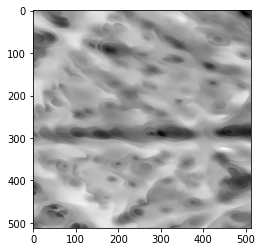

epoch 1701: 100.79725646972656
epoch 1702: 103.6317138671875
epoch 1703: 100.64600372314453
epoch 1704: 104.06929779052734
epoch 1705: 103.38805389404297
epoch 1706: 103.21833038330078
epoch 1707: 104.70304107666016
epoch 1708: 102.72296142578125
epoch 1709: 104.97529602050781
epoch 1711: 103.16986083984375
epoch 1712: 102.08389282226562
epoch 1713: 103.80744171142578
epoch 1714: 103.2127685546875
epoch 1715: 100.67562103271484
epoch 1716: 102.368896484375
epoch 1717: 103.41361999511719
epoch 1718: 103.35742950439453
epoch 1719: 102.6677474975586
epoch 1721: 103.51212310791016
epoch 1722: 101.12632751464844
epoch 1723: 102.71210479736328
epoch 1724: 104.1698989868164
epoch 1725: 103.77164459228516
epoch 1726: 102.86231231689453
epoch 1727: 105.22742462158203
epoch 1728: 102.0972900390625
epoch 1729: 104.46229553222656
epoch 1731: 104.31594848632812
epoch 1732: 106.6248550415039
epoch 1733: 103.45160675048828
epoch 1734: 105.26288604736328
epoch 1735: 104.24916076660156
epoch 1736: 102.

/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



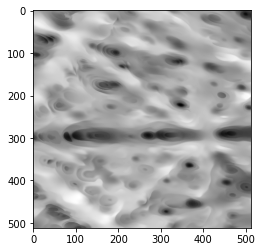

epoch 1801: 102.37024688720703
epoch 1802: 101.92928314208984
epoch 1803: 104.53642272949219
epoch 1804: 102.48423767089844
epoch 1805: 103.03520965576172
epoch 1806: 101.31229400634766
epoch 1807: 103.22122955322266
epoch 1808: 104.7725601196289
epoch 1809: 103.82896423339844
epoch 1811: 102.03475189208984
epoch 1812: 102.50831604003906
epoch 1813: 104.49440002441406
epoch 1814: 103.672119140625
epoch 1815: 103.35758972167969
epoch 1816: 101.55162048339844
epoch 1817: 104.02041625976562
epoch 1818: 101.80755615234375
epoch 1819: 104.44587707519531
epoch 1821: 100.84009552001953
epoch 1822: 106.10562896728516
epoch 1823: 102.87814331054688
epoch 1824: 103.20001220703125
epoch 1825: 103.90982055664062
epoch 1826: 103.45011901855469
epoch 1827: 102.11933898925781
epoch 1828: 102.4822998046875
epoch 1829: 103.28313446044922
epoch 1831: 102.4701156616211
epoch 1832: 101.7013931274414
epoch 1833: 103.62236785888672
epoch 1834: 101.98089599609375
epoch 1835: 103.46693420410156
epoch 1836: 10

/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



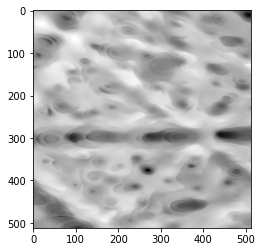

epoch 1901: 101.65095520019531
epoch 1902: 104.07984161376953
epoch 1903: 101.48025512695312
epoch 1904: 103.3219985961914
epoch 1905: 107.64778900146484
epoch 1906: 101.23441314697266
epoch 1907: 103.56412506103516
epoch 1908: 102.73106384277344
epoch 1909: 102.04479217529297
epoch 1911: 103.81488800048828
epoch 1912: 104.1342544555664
epoch 1913: 103.1029052734375
epoch 1914: 104.80379486083984
epoch 1915: 102.9721450805664
epoch 1916: 104.46544647216797
epoch 1917: 101.94503021240234
epoch 1918: 106.09715270996094
epoch 1919: 102.79933166503906
epoch 1921: 103.1941146850586
epoch 1922: 102.27700805664062
epoch 1923: 102.57859802246094
epoch 1924: 104.1001205444336
epoch 1925: 100.30017852783203
epoch 1926: 103.31820678710938
epoch 1927: 102.18387603759766
epoch 1928: 101.41577911376953
epoch 1929: 101.96495056152344
epoch 1931: 102.74603271484375
epoch 1932: 103.39991760253906
epoch 1933: 101.56452941894531
epoch 1934: 102.11371612548828
epoch 1935: 100.84475708007812
epoch 1936: 10

/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



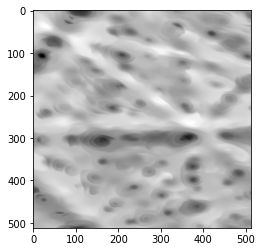

epoch 2001: 104.86802673339844
epoch 2002: 100.65931701660156
epoch 2003: 103.71247863769531
epoch 2004: 103.08433532714844
epoch 2005: 104.88719177246094
epoch 2006: 102.1437759399414
epoch 2007: 101.90926361083984
epoch 2008: 103.85385131835938
epoch 2009: 101.9245834350586
epoch 2011: 101.704833984375
epoch 2012: 104.88914489746094
epoch 2013: 105.36427307128906
epoch 2014: 100.67404174804688
epoch 2015: 101.06609344482422
epoch 2016: 103.43912506103516
epoch 2017: 102.67204284667969
epoch 2018: 101.09706115722656
epoch 2019: 105.15052795410156
epoch 2021: 103.32460021972656
epoch 2022: 104.04298400878906
epoch 2023: 101.86572265625
epoch 2024: 101.49742126464844
epoch 2025: 100.89723205566406
epoch 2026: 103.22339630126953
epoch 2027: 102.34261322021484
epoch 2028: 106.28800964355469
epoch 2029: 103.07896423339844
epoch 2031: 103.74750518798828
epoch 2032: 103.26082611083984
epoch 2033: 102.21808624267578
epoch 2034: 104.45336151123047
epoch 2035: 104.65345001220703
epoch 2036: 100

/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



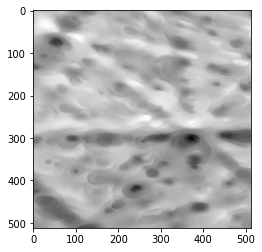

epoch 2101: 101.02002716064453
epoch 2102: 103.3508071899414
epoch 2103: 103.34788513183594
epoch 2104: 101.46430969238281
epoch 2105: 101.07086944580078
epoch 2106: 103.69292449951172
epoch 2107: 104.82119750976562
epoch 2108: 103.99143981933594
epoch 2109: 102.56947326660156
epoch 2111: 99.92250061035156
epoch 2112: 103.36932373046875
epoch 2113: 102.27720642089844
epoch 2114: 104.31237030029297
epoch 2115: 103.54867553710938
epoch 2116: 102.47197723388672
epoch 2117: 103.33910369873047
epoch 2118: 103.35083770751953
epoch 2119: 103.13584899902344
epoch 2121: 103.7408447265625
epoch 2122: 103.88040161132812
epoch 2123: 102.50283813476562
epoch 2124: 103.15081787109375
epoch 2125: 103.4677734375
epoch 2126: 101.168212890625
epoch 2127: 104.08517456054688
epoch 2128: 99.54022216796875
epoch 2129: 100.04244232177734
epoch 2131: 103.73650360107422
epoch 2132: 102.33474731445312
epoch 2133: 103.17941284179688
epoch 2134: 102.64086151123047
epoch 2135: 101.93206024169922
epoch 2136: 102.98

/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



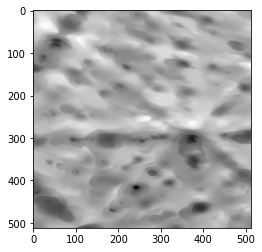

epoch 2201: 101.81822967529297
epoch 2202: 101.8713150024414
epoch 2203: 101.14501953125
epoch 2204: 101.81981658935547
epoch 2205: 101.50637817382812
epoch 2206: 102.35833740234375
epoch 2207: 101.59815216064453
epoch 2208: 100.08056640625
epoch 2209: 102.22108459472656
epoch 2211: 98.96066284179688
epoch 2212: 102.53026580810547
epoch 2213: 102.28535461425781
epoch 2214: 100.82376861572266
epoch 2215: 104.05967712402344
epoch 2216: 101.90619659423828
epoch 2217: 100.53370666503906
epoch 2218: 101.0792236328125
epoch 2219: 103.52021026611328
epoch 2221: 99.98247528076172
epoch 2222: 100.84159088134766
epoch 2223: 102.56197357177734
epoch 2224: 105.09429168701172
epoch 2225: 100.78987121582031
epoch 2226: 103.17255401611328
epoch 2227: 103.77792358398438
epoch 2228: 101.86622619628906
epoch 2229: 102.8436050415039
epoch 2231: 103.63819885253906
epoch 2232: 104.47832489013672
epoch 2233: 100.09625244140625
epoch 2234: 103.06110382080078
epoch 2235: 101.5885238647461
epoch 2236: 101.6973

/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



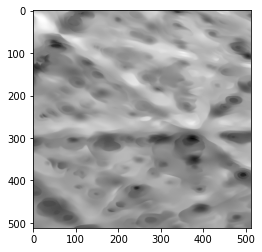

epoch 2301: 101.74418640136719
epoch 2302: 99.80682373046875
epoch 2303: 103.00366973876953
epoch 2304: 100.7603988647461
epoch 2305: 103.4542465209961
epoch 2306: 103.00621032714844
epoch 2307: 102.98507690429688
epoch 2308: 102.14302825927734
epoch 2309: 99.85084533691406
epoch 2311: 101.50450134277344
epoch 2312: 101.71607971191406
epoch 2313: 99.82390594482422
epoch 2314: 101.48299407958984
epoch 2315: 100.41474151611328
epoch 2316: 101.77848052978516
epoch 2317: 102.44239044189453
epoch 2318: 100.39988708496094
epoch 2319: 102.17501831054688
epoch 2321: 101.77325439453125
epoch 2322: 99.9126205444336
epoch 2323: 103.35234069824219
epoch 2324: 99.69244384765625
epoch 2325: 102.27790832519531
epoch 2326: 102.48297882080078
epoch 2327: 104.76133728027344
epoch 2328: 102.37554168701172
epoch 2329: 104.10630798339844
epoch 2331: 102.73660278320312
epoch 2332: 98.96536254882812
epoch 2333: 103.4664077758789
epoch 2334: 101.86802673339844
epoch 2335: 100.7016372680664
epoch 2336: 99.9388

/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



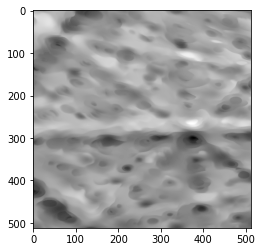

epoch 2401: 102.1924057006836
epoch 2402: 101.69135284423828
epoch 2403: 99.70065307617188
epoch 2404: 102.13876342773438
epoch 2405: 100.62374877929688
epoch 2406: 103.2535400390625
epoch 2407: 99.66707611083984
epoch 2408: 102.41841125488281
epoch 2409: 98.64300537109375
epoch 2411: 104.37770080566406
epoch 2412: 102.67371368408203
epoch 2413: 101.99060821533203
epoch 2414: 102.13970947265625
epoch 2415: 97.00582885742188
epoch 2416: 99.8653793334961
epoch 2417: 101.20812225341797
epoch 2418: 105.01988983154297
epoch 2419: 104.07022094726562
epoch 2421: 103.7616195678711
epoch 2422: 101.89572143554688
epoch 2423: 101.08255767822266
epoch 2424: 101.11632537841797
epoch 2425: 101.47577667236328
epoch 2426: 101.67465209960938
epoch 2427: 103.78489685058594
epoch 2428: 100.22379302978516
epoch 2429: 100.8530044555664
epoch 2431: 103.12583923339844
epoch 2432: 98.95802307128906
epoch 2433: 103.74876403808594
epoch 2434: 100.64046478271484
epoch 2435: 100.1418228149414
epoch 2436: 99.54933

/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



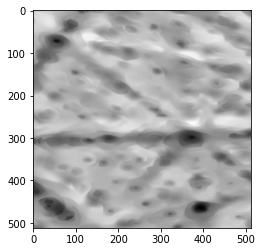

epoch 2501: 101.95623779296875
epoch 2502: 104.866455078125
epoch 2503: 98.59010314941406
epoch 2504: 100.26388549804688
epoch 2505: 104.68962097167969
epoch 2506: 100.38929748535156
epoch 2507: 100.14207458496094
epoch 2508: 101.56390380859375
epoch 2509: 101.34994506835938
epoch 2511: 102.8343276977539
epoch 2512: 98.78227233886719
epoch 2513: 100.50188446044922
epoch 2514: 101.04444885253906
epoch 2515: 103.11515045166016
epoch 2516: 102.23064422607422
epoch 2517: 102.6808853149414
epoch 2518: 102.72515869140625
epoch 2519: 102.73219299316406
epoch 2521: 101.78361511230469
epoch 2522: 102.30921173095703
epoch 2523: 101.6181869506836
epoch 2524: 100.91878509521484
epoch 2525: 102.3119125366211
epoch 2526: 102.96969604492188
epoch 2527: 101.58032989501953
epoch 2528: 102.05558776855469
epoch 2529: 100.4566879272461
epoch 2531: 99.86168670654297
epoch 2532: 102.85330963134766
epoch 2533: 102.58232116699219
epoch 2534: 101.03128814697266
epoch 2535: 102.65760040283203
epoch 2536: 103.69

/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



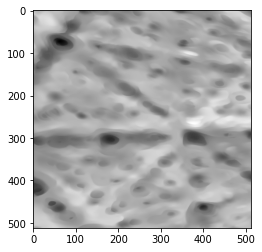

epoch 2601: 102.24685668945312
epoch 2602: 100.39569091796875
epoch 2603: 101.47637176513672
epoch 2604: 100.37877655029297
epoch 2605: 99.7646484375
epoch 2606: 102.32052612304688
epoch 2607: 100.14922332763672
epoch 2608: 100.68047332763672
epoch 2609: 102.54620361328125
epoch 2611: 102.71665954589844
epoch 2612: 101.76679992675781
epoch 2613: 101.29547882080078
epoch 2614: 102.73970794677734
epoch 2615: 101.36579132080078
epoch 2616: 99.8297348022461
epoch 2617: 103.28023529052734
epoch 2618: 105.84976959228516
epoch 2619: 102.0860366821289
epoch 2621: 101.724853515625
epoch 2622: 100.55357360839844
epoch 2623: 102.82357025146484
epoch 2624: 99.67015838623047
epoch 2625: 102.59271240234375
epoch 2626: 101.23301696777344
epoch 2627: 100.52214050292969
epoch 2628: 99.9034423828125
epoch 2629: 102.19119262695312
epoch 2631: 98.59729766845703
epoch 2632: 100.9385757446289
epoch 2633: 104.66963195800781
epoch 2634: 102.62960052490234
epoch 2635: 102.9238052368164
epoch 2636: 100.77828979

/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



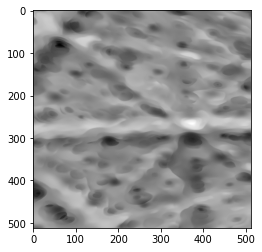

epoch 2701: 103.04927062988281
epoch 2702: 99.74114990234375
epoch 2703: 104.34602355957031
epoch 2704: 101.5228500366211
epoch 2705: 102.76154327392578
epoch 2706: 103.06668090820312
epoch 2707: 102.8587875366211
epoch 2708: 102.09376525878906
epoch 2709: 102.61735534667969
epoch 2711: 101.6612319946289
epoch 2712: 100.1835708618164
epoch 2713: 101.2409439086914
epoch 2714: 101.30865478515625
epoch 2715: 101.7465591430664
epoch 2716: 102.63735961914062
epoch 2717: 101.33850860595703
epoch 2718: 100.23556518554688
epoch 2719: 99.00238037109375
epoch 2721: 103.3868637084961
epoch 2722: 104.02684783935547
epoch 2723: 101.33203887939453
epoch 2724: 100.39395904541016
epoch 2725: 99.33684539794922
epoch 2726: 106.18265533447266
epoch 2727: 100.40648651123047
epoch 2728: 102.08808898925781
epoch 2729: 104.89289855957031
epoch 2731: 102.65321350097656
epoch 2732: 103.00418853759766
epoch 2733: 101.5364761352539
epoch 2734: 101.17390441894531
epoch 2735: 101.95034790039062
epoch 2736: 102.418

/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



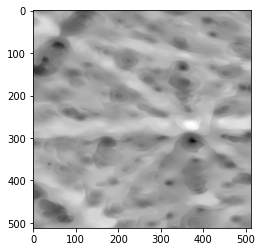

epoch 2801: 100.75435638427734
epoch 2802: 103.18571472167969
epoch 2803: 104.41416931152344
epoch 2804: 100.48716735839844
epoch 2805: 102.88548278808594
epoch 2806: 101.81510162353516
epoch 2807: 101.02050018310547
epoch 2808: 104.47632598876953
epoch 2809: 102.66059112548828
epoch 2811: 103.05192565917969
epoch 2812: 99.44161224365234
epoch 2813: 100.26859283447266
epoch 2814: 103.59334564208984
epoch 2815: 102.64002227783203
epoch 2816: 99.827392578125
epoch 2817: 103.03787231445312
epoch 2818: 101.84037780761719
epoch 2819: 101.84081268310547
epoch 2821: 102.5331039428711
epoch 2822: 102.70965576171875
epoch 2823: 100.90775299072266
epoch 2824: 100.34964752197266
epoch 2825: 100.04076385498047
epoch 2826: 101.41223907470703
epoch 2827: 101.55076599121094
epoch 2828: 101.54002380371094
epoch 2829: 101.64540100097656
epoch 2831: 100.75041198730469
epoch 2832: 100.0694351196289
epoch 2833: 101.02665710449219
epoch 2834: 102.79106140136719
epoch 2835: 101.5553970336914
epoch 2836: 101

/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



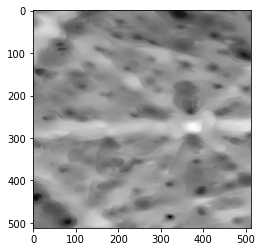

epoch 2901: 99.91478729248047
epoch 2902: 103.35767364501953
epoch 2903: 100.52049255371094
epoch 2904: 101.90735626220703
epoch 2905: 99.84239959716797
epoch 2906: 101.62152862548828
epoch 2907: 102.09183502197266
epoch 2908: 102.75459289550781
epoch 2909: 100.42864227294922
epoch 2911: 99.65625762939453
epoch 2912: 103.68978118896484
epoch 2913: 100.92322540283203
epoch 2914: 101.48963165283203
epoch 2915: 101.63690185546875
epoch 2916: 101.66405487060547
epoch 2917: 100.74112701416016
epoch 2918: 98.91109466552734
epoch 2919: 100.83355712890625
epoch 2921: 100.92567443847656
epoch 2922: 103.72672271728516
epoch 2923: 97.95931243896484
epoch 2924: 101.85235595703125
epoch 2925: 103.62631225585938
epoch 2926: 103.1925277709961
epoch 2927: 101.49734497070312
epoch 2928: 100.81790161132812
epoch 2929: 102.65830993652344
epoch 2931: 100.7514419555664
epoch 2932: 100.3753662109375
epoch 2933: 103.92680358886719
epoch 2934: 101.39199829101562
epoch 2935: 102.13826751708984
epoch 2936: 102.

KeyboardInterrupt: 

In [3]:
bs = 2 ** 10

def generate_sphere_pc(ego, bs):
    '''
    Given an ego location and the number of points to sample, sample
    points on a sphere centered at the origin that are facing ego
    '''
    theta, phi, r = trand(bs) * np.pi * 2.0, trand(bs) * np.pi, 1.0
    
    point_batch = torch.stack((torch.sin(phi) * torch.cos(theta) * r,
                               torch.sin(phi) * torch.sin(theta) * r,
                               torch.cos(phi) * r), dim=1)
    
    aligned = torch.bmm(point_batch.unsqueeze(1), 
                        ego.unsqueeze(0).unsqueeze(2).expand(bs, -1, -1)) \
                        .squeeze()
    aligned = (aligned > 0).nonzero()

    return torch.gather(point_batch, dim=0, index=aligned.expand(-1, 3))

def generate_bunny_pc(ego):
    '''
    Given an ego location and the number of points to sample, sample
    points on a bunny centered at the origin that are facing ego
    '''
    point_batch = torch.from_numpy(get_bunny()).cuda()
    bs = point_batch.shape[0]
    
    aligned = torch.bmm(point_batch.unsqueeze(1), 
                        ego.unsqueeze(0).unsqueeze(2).expand(bs, -1, -1)) \
                        .squeeze()
    aligned = (aligned > 0).nonzero()

    return torch.gather(point_batch, dim=0, index=aligned.expand(-1, 3))

def visualize_pointcloud_hemisphere(sph):
    with torch.no_grad():
        sph = sph.cpu().numpy()

        pts_fig = go.Figure(data=[go.Scatter3d(
            x=sph[:, 0],
            y=sph[:, 1],
            z=sph[:, 2],
            mode='markers',
            marker=dict(
                size=2,
                colorscale='Viridis',
                opacity=0.8
            )
        )])
        pts_fig.show()

sdf_siren = Siren(in_features=3, 
                  out_features=1, 
                  hidden_features=64,
                  hidden_layers=2,
                  outermost_linear=True)
sdf_siren = sdf_siren.cuda()
#sdf_siren = OccupancyNetwork().cuda()

optim = torch.optim.Adam(lr=1e-4, params=sdf_siren.parameters())

ego = torch.tensor([0.0, 0.0, 8.0]).cuda()

#visualize_pointcloud_hemisphere(generate_sphere_pc(ego, bs))
visualize_pointcloud_hemisphere(generate_bunny_pc(ego))

for epoch in range(1000000):
    '''theta, phi, r = trand(bs) * np.pi * 2.0, trand(bs) * np.pi, 1.0
    point_batch = torch.stack((torch.sin(phi) * torch.cos(theta) * r,
                                   torch.sin(phi) * torch.sin(theta) * r,
                                   torch.cos(phi) * r), dim=1)'''

    #point_batch = generate_sphere_pc(ego, bs)
    point_batch = generate_bunny_pc(ego)
    eikonal_points = trand((point_batch.shape[0], 3)).cuda() * 5.0 - 2.5

    point_batch = point_batch.cuda()
    model_output, coords = sdf_siren(point_batch)

    model_output_rand, coords_rand = sdf_siren(eikonal_points)
    gc = gradient(model_output_rand, coords_rand)

    sample_positions = sample_on_rays(point_batch, ego)
    ego_dist, _ = sdf_siren(ego.expand(2, ego.shape[0]).cuda())
    exterior_dist, _ = sdf_siren(sample_positions.view(-1, 3))

    with torch.no_grad():
        pc_normals = compute_normals(point_batch, ego, use_rings=False).cuda()

    c_reconstruction = 3e3 # 1.0
    c_eikonal = 5e1 # 1.0
    c_inter = 1e2 # 1.0
    c_ext = 1e2 # 1.0
    c_normals = 1e2

    l_reconstruction = (model_output ** 2).mean() * c_reconstruction
    l_eikonal = ((1.0 - (gc[:, 0] ** 2 + gc[:, 1] ** 2 + gc[:, 2] ** 2)) ** 2).mean() * c_eikonal
    l_inter = torch.exp(-1e2 * torch.abs(model_output_rand)).mean() * c_inter
    l_exterior = (torch.exp(torch.max(-exterior_dist,
                                      tz(exterior_dist.shape))).mean() - 1) * c_ext
    l_normals = (1 - torch.nn.functional.cosine_similarity(pc_normals, gc, dim=-1).mean()) * c_normals

    loss = l_reconstruction + l_eikonal + l_inter + l_exterior + l_normals
    
    optim.zero_grad()
    loss.backward()
    optim.step()

    if epoch % 10:
        print("epoch {}: {}".format(epoch, loss))
    if epoch % 100 == 0:
        print("reconstruction loss", l_reconstruction, 
            "eikonal loss", l_eikonal,
            "exterior loss", l_exterior,
            "inter loss", l_inter,
            "normal_loss", l_normals)
        print("worst of last batch", abs(model_output).max())
        render(sdf_siren)